In [1]:
import pandas as pd

<AxesSubplot:xlabel='tmax', ylabel='tmax_tomorrow'>

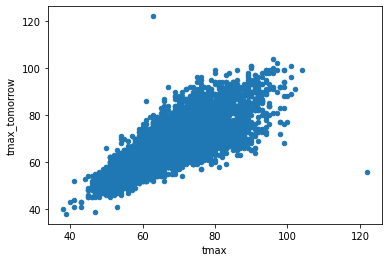

In [2]:
# Read in the data
data = pd.read_csv("clean_weather.csv", index_col=0)
# Fill in any missing values in the data with past values
data = data.ffill()

# Create a scatter plot of tmax and tmax_tomorrow
data.plot.scatter("tmax", "tmax_tomorrow")

In [3]:
data.corr()

,tmax,tmin,rain,tmax_tomorrow
tmax,1.000000,0.615604,-0.219941,0.818561
tmin,0.615604,1.000000,-0.019546,0.585572
rain,-0.219941,-0.019546,1.000000,-0.211799
tmax_tomorrow,0.818561,0.585572,-0.211799,1.000000


In [4]:
import matplotlib.pyplot as plt

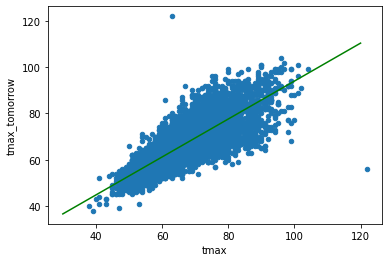

In [7]:
data.plot.scatter("tmax", "tmax_tomorrow")

prediction = lambda x,w1=0.82,b = 11.99: x * w1 + b

plt.plot([30,120], [prediction(30),prediction(120)],"green")

In [8]:
import numpy as np

In [9]:
def mse(actual,predicted):
    return np.mean((actual-predicted)**2)

In [11]:
print(mse(data["tmax_tomorrow"],prediction(data["tmax"])))

22.897335324598416


In [33]:
print(mse(data["tmax_tomorrow"],prediction(data["tmax"],.83)))
print(mse(data["tmax_tomorrow"],prediction(data["tmax"],.82,11.95)))

23.474003804870822
22.89098086460878


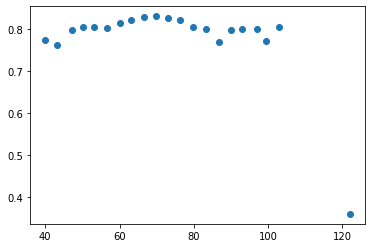

In [41]:
tmax_bins = pd.cut(data["tmax"],25)
# Calculate the average ratio between tmax_tomorrow and tmax in each bin
ratios = (data["tmax_tomorrow"] - 11.99 )/ data["tmax"]
binned_ratio = ratios.groupby(tmax_bins).mean()
# Calculate the average tmax in each bin
binned_tmax = data["tmax"].groupby(tmax_bins).mean()
# Graph the tmax values versus the ratios
plt.scatter(binned_tmax, binned_ratio)

In [40]:
binned_ratio


tmax
(37.916, 41.36]     0.773904
(41.36, 44.72]      0.762256
(44.72, 48.08]      0.798484
(48.08, 51.44]      0.805470
(51.44, 54.8]       0.803930
(54.8, 58.16]       0.802731
(58.16, 61.52]      0.812934
(61.52, 64.88]      0.821545
(64.88, 68.24]      0.829101
(68.24, 71.6]       0.830022
(71.6, 74.96]       0.825879
(74.96, 78.32]      0.822207
(78.32, 81.68]      0.804168
(81.68, 85.04]      0.800264
(85.04, 88.4]       0.769633
(88.4, 91.76]       0.796350
(91.76, 95.12]      0.798793
(95.12, 98.48]      0.800002
(98.48, 101.84]     0.771846
(101.84, 105.2]     0.805621
(105.2, 108.56]          NaN
(108.56, 111.92]         NaN
(111.92, 115.28]         NaN
(115.28, 118.64]         NaN
(118.64, 122.0]     0.360738
dtype: float64

$y = wx + b$

$ y = relu(wx + b)$

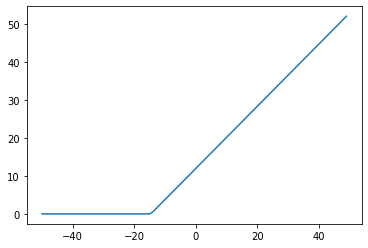

In [43]:
# Generate a range of predictions between -50 and 50.
temps = np.arange(-50,50)

# Predict tmax_tomorrow given each of our input temps
plt.plot(temps, np.maximum(0, prediction(temps)))

$ \hat{y}  = w_{2} * relu(w_{1}x + b) + b_{2}$

(0.0, 40.0)

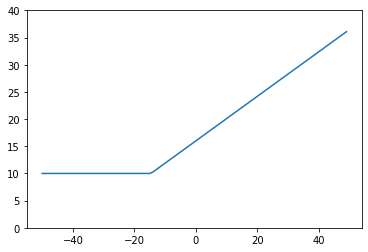

In [45]:
# Predict tmax_tomorrow given each of our input temps
# Apply prediction twice to simulate 2 network layers
layer1 = np.maximum(0, prediction(temps))
layer2 = prediction(layer1, .5, 10)
plt.plot(temps, layer2)

# Set the y axis of the plot to start at 0
plt.ylim((0,40))

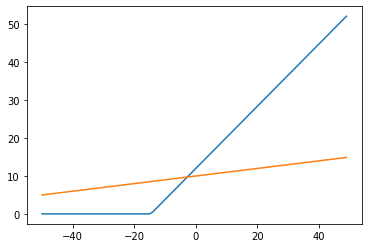

In [46]:
# Plot our first regression line, with w1 of .82, and b of 11.99
plt.plot(temps, np.maximum(0, prediction(temps)))

# Plot our second regression line, with w1 of .1, and b of 10
plt.plot(temps, np.maximum(0, prediction(temps, .1, 10)))

(0.0, 40.0)

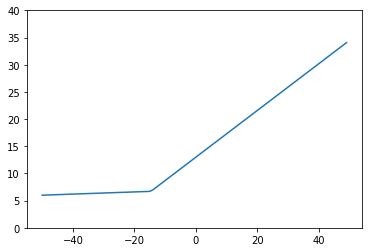

In [47]:
layer1_unit1 = np.maximum(0, prediction(temps))
# Output from unit 2 of layer 1
layer1_unit2 = np.maximum(0, prediction(temps, .1, 10))
# Output from layer 2 - multiply the outputs of layer 1 unit 1 and layer 1 unit 2 by the respective weights, and add the bias
layer2 = prediction(layer1_unit1, .5, 0) + prediction(layer1_unit2, .2, 0) + 5
plt.plot(temps, layer2)

# Set the y axis of the plot to start at 0
plt.ylim((0,40))

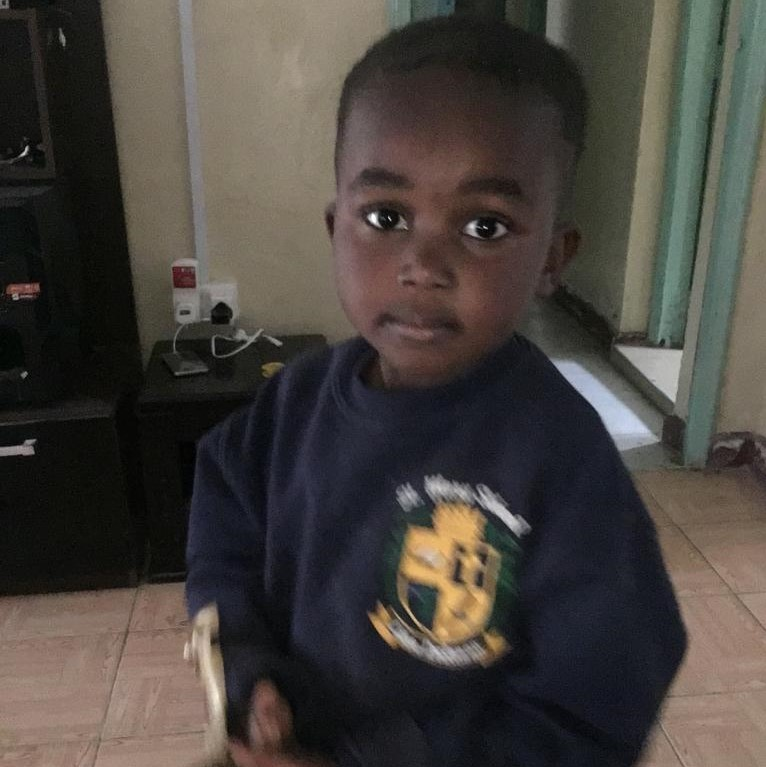

In [66]:
from tsensor import explain as exp


# Get 5 temperature values
input = np.array([[80], [90], [100], [-20], [-10]])

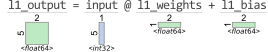

array([[77.59, 18.  ],
       [85.79, 19.  ],
       [93.99, 20.  ],
       [-4.41,  8.  ],
       [ 3.79,  9.  ]])

In [67]:
# Create the weight matrix, which is 1x2
l1_weights = np.array([[.82, .1]])

# Create the 1x2 bias matrix
l1_bias = np.array([[11.99, 10]])

# This is the output of the layer
with exp() as c:
    l1_output = input @ l1_weights + l1_bias

l1_output

In [68]:
l1_activated = np.maximum(l1_output, 0)
l1_activated

array([[77.59, 18.  ],
       [85.79, 19.  ],
       [93.99, 20.  ],
       [ 0.  ,  8.  ],
       [ 3.79,  9.  ]])

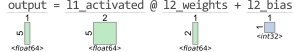

array([[47.395],
       [51.695],
       [55.995],
       [ 6.6  ],
       [ 8.695]])

In [69]:
l2_weights = np.array([
    [.5],
    [.2]
])

l2_bias = np.array([[5]])

# This is the output of the layer
with exp():
    output = l1_activated @ l2_weights + l2_bias

output

In [70]:
tmax = np.array([[80], [90], [100], [-20], [-10]])
tmax_tomorrow = np.array([[83], [89], [95], [-22], [-9]])

In [71]:
def mse(actual, predicted):
    return (actual - predicted) ** 2

In [72]:
mse(tmax_tomorrow, output)

array([[1267.716025],
       [1391.663025],
       [1521.390025],
       [ 817.96    ],
       [ 313.113025]])

In [73]:
def mse_grad(actual, predicted):
    return predicted - actual

mse_grad(tmax_tomorrow, output)


array([[-35.605],
       [-37.305],
       [-39.005],
       [ 28.6  ],
       [ 17.695]])

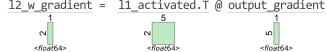

array([[-9562.0038],
       [-1741.73  ]])

In [74]:
output_gradient = mse_grad(tmax_tomorrow, output)

with exp():
    l2_w_gradient =  l1_activated.T @ output_gradient

l2_w_gradient

In [79]:
from sympy import diff, symbols

# Define symbols for our equation
x, w = symbols('X, W')
# Define input times weights in sympy
sympy_output = x * (w**2)
# Take the derivative of output with respect to w
diff(sympy_output, w)

2*W*X

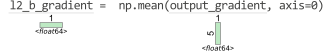

array([-13.124])

In [80]:
with exp():
    l2_b_gradient =  np.mean(output_gradient, axis=0)

l2_b_gradient

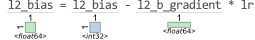

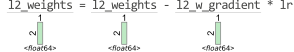

array([[0.59562004],
       [0.2174173 ]])

In [81]:
# Set a learning rate
lr = 1e-5

with exp():
    # Update the bias values
    l2_bias = l2_bias - l2_b_gradient * lr
    # Update the weight values
    l2_weights = l2_weights - l2_w_gradient * lr

l2_weights

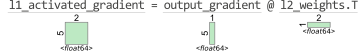

array([[-21.20705145,  -7.74114297],
       [-22.21960552,  -8.11075238],
       [-23.23215958,  -8.48036179],
       [ 17.03473309,   6.21813478],
       [ 10.53949657,   3.84719912]])

In [82]:
with exp():
    # Calculate the gradient on the output of layer 1
    l1_activated_gradient = output_gradient @ l2_weights.T

l1_activated_gradient

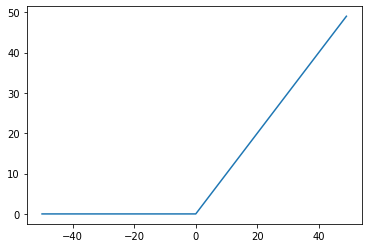

In [83]:
 # Generate a range of predictions between -50 and 50.
temps = np.arange(-50,50)

# Predict tmax_tomorrow given each of our input temps
plt.plot(temps, np.maximum(0, temps))

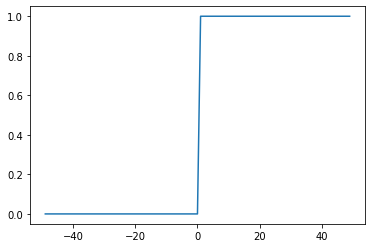

In [84]:

# Compute the relu function over the temperatures
activation = np.maximum(0, temps)

# Plot the input temperatures against the derivative of relu (the slope)
# np.roll will shift the values to the right one place, so we subtract the previous value
plt.plot(temps[1:], activation[1:] - np.roll(activation, 1)[1:])

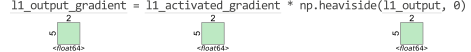

array([[-21.20705145,  -7.74114297],
       [-22.21960552,  -8.11075238],
       [-23.23215958,  -8.48036179],
       [  0.        ,   6.21813478],
       [ 10.53949657,   3.84719912]])

In [85]:
with exp():
    l1_output_gradient = l1_activated_gradient * np.heaviside(l1_output, 0)

l1_output_gradient

In [86]:
# Calculate gradients wrt weights and biases for layer 1
l1_w_gradient =  input.T @ l1_output_gradient
l1_b_gradient = np.mean(l1_output_gradient, axis=0)

l1_weights -= l1_w_gradient * lr
l1_bias -= l1_b_gradient * lr

In [87]:
l1_weights

array([[0.8812494, 0.1236013]])

In [88]:
l1_bias

array([[11.99011224, 10.00002853]])

In [89]:
#import numpy as np
from sklearn.preprocessing import StandardScaler
PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

# Scale our data so relu works better
# All temperature values in the original dataset are over 0, so relu won't do much for several epochs
# Scaling will make some of the input data negative
scaler = StandardScaler()
data[PREDICTORS] = scaler.fit_transform(data[PREDICTORS])

split_data = np.split(data, [int(.7 * len(data)), int(.85 * len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in
                                                            split_data]

In [90]:
def init_layers(inputs):
    layers = []
    for i in range(1, len(inputs)):
        layers.append([
            np.random.rand(inputs[i-1], inputs[i]) / 5 - .1,
            np.ones((1,inputs[i]))
        ])
    return layers

# This will initialize weights and biases for a 3-layer neural network with 10 units in the first layer, 10 in the second, and 1 in the final
# The first number (3) is our number of input features
layer_conf = [3,10,10,1]

In [97]:
layer = init_layers(layer_conf)
layer

[[array([[-0.07971825,  0.05798499, -0.02387294, -0.03173858,  0.07887653,
          -0.06812606, -0.09430193,  0.06232339, -0.00455027, -0.00332875],
         [-0.02565289,  0.02053295,  0.02193394, -0.0984047 ,  0.06914915,
           0.07831574,  0.06786558,  0.03266055, -0.04075225, -0.00631366],
         [ 0.01720119,  0.03607852, -0.02891014,  0.05039543, -0.01320639,
           0.0024785 , -0.0768584 , -0.06377365,  0.03160148, -0.04783398]]),
  array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])],
 [array([[-0.03496059,  0.09957975, -0.08788463, -0.09620693, -0.09984799,
           0.06185778,  0.06446539, -0.03898023, -0.0711678 ,  0.06182042],
         [-0.0382135 , -0.07730218,  0.088665  , -0.05390009,  0.07251789,
           0.05764049,  0.01599246,  0.07864605, -0.01636292,  0.0798739 ],
         [-0.00406945, -0.07915723, -0.06778553,  0.07307376,  0.00342743,
           0.07936229, -0.01633062, -0.07577128, -0.04280046, -0.0297778 ],
         [ 0.06801693,  0.05254201, -0

In [91]:
def forward(batch, layers):
    hidden = [batch.copy()]
    for i in range(len(layers)):
        batch = np.matmul(batch, layers[i][0]) + layers[i][1]
        if i < len(layers) - 1:
            batch = np.maximum(batch, 0)
        # Store the forward pass hidden values for use in backprop
        hidden.append(batch.copy())
    return batch, hidden

In [92]:
def backward(layers, hidden, grad, lr):
    for i in range(len(layers)-1, -1, -1):
        if i != len(layers) - 1:
            grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))

        w_grad = hidden[i].T @ grad
        b_grad = np.mean(grad, axis=0)

        layers[i][0] -= w_grad * lr
        layers[i][1] -= b_grad * lr
        
        grad = grad @ layers[i][0].T
    return layers

In [93]:
from statistics import mean

lr = 1e-6
epochs=10
batch_size = 8

layers = init_layers(layer_conf)

for epoch in range(epochs):
    epoch_loss = []

    for i in range(0, train_x.shape[0], batch_size):
        x_batch = train_x[i:(i+batch_size)]
        y_batch = train_y[i:(i+batch_size)]
        pred, hidden = forward(x_batch, layers)

        loss = mse_grad(y_batch, pred)
        epoch_loss.append(np.mean(loss ** 2))

        layers = backward(layers, hidden, loss, lr)


    valid_preds, _ = forward(valid_x, layers)

    print(f"Epoch: {epoch} Train MSE: {mean(epoch_loss)} Valid MSE: {np.mean(mse(valid_preds,valid_y))}")

Epoch: 0 Train MSE: 3135.48004354427 Valid MSE: 1395.5316779431284
Epoch: 1 Train MSE: 264.679104296597 Valid MSE: 24.263579096570247
Epoch: 2 Train MSE: 22.959864558311537 Valid MSE: 21.14254564968968
Epoch: 3 Train MSE: 22.336291807758442 Valid MSE: 20.827770106374278
Epoch: 4 Train MSE: 22.15119856260039 Valid MSE: 20.76744846510114
Epoch: 5 Train MSE: 22.102622360866825 Valid MSE: 20.759944031842853
Epoch: 6 Train MSE: 22.08838135601722 Valid MSE: 20.761809928050972
Epoch: 7 Train MSE: 22.082796369945925 Valid MSE: 20.76378629501496
Epoch: 8 Train MSE: 22.07970114261537 Valid MSE: 20.76497844627331
Epoch: 9 Train MSE: 22.077178427717584 Valid MSE: 20.76517771144684


In [94]:
layers[0]

[array([[ 0.16997371,  0.19982679,  0.15423761,  0.06755947,  0.04281993,
          0.06707678,  0.18131275,  0.14448372,  0.09959967,  0.08703157],
        [ 0.0567489 , -0.05608258,  0.07420255,  0.0236693 ,  0.07533386,
          0.05359104, -0.03409319,  0.03717752,  0.05256079, -0.03226758],
        [ 0.06252801,  0.08534627, -0.15617472,  0.08837493, -0.06243224,
         -0.04899233,  0.03674441,  0.01430775, -0.02254296, -0.08606997]]),
 array([[1.07765345, 1.065578  , 1.08261168, 1.06057101, 1.06825358,
         1.08237054, 1.07056015, 1.07118645, 1.07187065, 1.07757577]])]

In [95]:
pred, hidden = forward(test_x, layers)
np.mean(mse(test_y, pred))

22.083868329476104